In [22]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.wcs as wcs
from astropy.coordinates import SkyCoord
from astropy.nddata.utils import Cutout2D
from astropy.io import ascii, fits
from astropy.table import Table
from astropy import units as u

from herschelhelp import image_plotting

import pymoc

In [15]:
radio_masterlist = Table.read('../../../HELP/dmu_products/dmu12/data/xmatch_all_masterlist_20181026.fits')

In [2]:
pswfits='../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/Lockman-SWIRE_SPIRE250_v1.0.fits'#SPIRE 250 map
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist[1].header

im250=hdulist[1].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist[1].header)
pixsize250=3600.0*w_250.wcs.cd[1,1] #pixel size (in arcseconds)
hdulist.close()

masterlist = Table.read('../../../HELP/dmu_products/dmu32/dmu32_Lockman-SWIRE/data/Lockman-SWIRE_20180219.fits')
blind_source_list = Table.read('../../../HELP/dmu_products/dmu22/dmu22_Lockman-SWIRE/data/dmu22_XID+SPIRE_Lockman-SWIRE_BLIND_Matched_MF.fits')

fname = '../../../HELP/dmu_products/dmu12/data/lockman_full_ampphase1m_shift.app.restored.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

mask = ~np.isnan(masterlist['f_spire_250'])
xidcat = masterlist[mask]

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

In [20]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['black','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[True,False,False]}

plotting 52 sources
using redshift
plotting 8 sources
plotting 13 sources


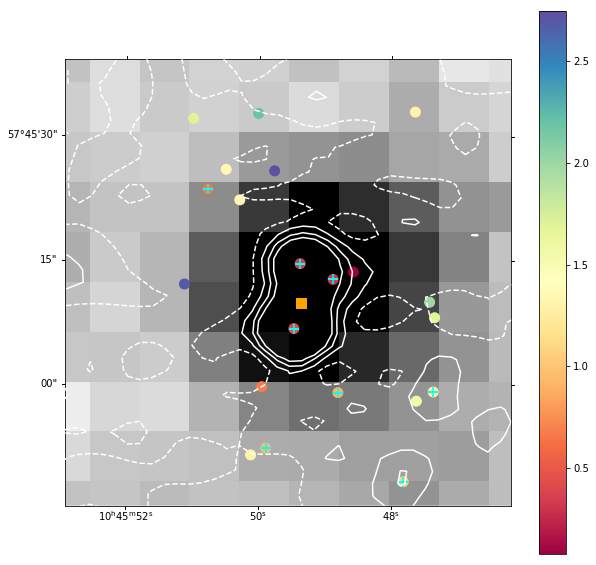

In [21]:

image_plotting.plot_figure(im250,[masterlist,xidcat,radio_masterlist],w_250,161.455,57.754,plot_params,contour_data=[radim_data,radim_wcs])

In [23]:
elais = Table.read('../../../HELP/dmu_products/dmu32/dmu32_ELAIS-N1/data/ELAIS-N1_20171020.fits')

In [30]:
mask = ~np.isnan(elais['f_spire_250'])
c = SkyCoord(ra=elais[mask]['ra'],dec=elais[mask]['dec'])

In [35]:
moc = catalog.catalog_to_moc(c,60,13)

In [34]:
from pymoc.util import catalog

In [36]:
from pymoc.io import fits

In [37]:
fits.write_moc_fits(moc,'fir_region_ELAIS-N1.fits')